# Classification Predict : Climate Change Belief Analysis

<h2><center> Team_7:</center></h2>
 
<center>- Kwenadi Letsoalo
<center>- Rinae Tshivhidzo
<center>- Kgotso Phela
<center>- Matome Peta
<center>- Rookaya Madari


<img src="https://github.com/Rinae-D/classification-predict-streamlit-template/blob/master/Climate_Action_Poster.png?raw=1" width="1500">

##  Introduction

Climate change is the long-term shift in global or regional temperature and typical weather patterns. These shifts may be natural but the cause of current climate change is largely human activity, like burning fossil fuels, such as natural gas, oil, and coal. Burning these materials releases what are called greenhouse gases into Earth’s atmosphere. There, these gases trap heat from the sun’s rays inside the atmosphere causing Earth’s average temperature to rise. However,recently many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. 

### Problem statement 

With that being said, they would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

### Main Objective

To creat a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their  tweet data.

### Data Information <br>
The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Sentiments: <br>
 1:   The tweet supports the belief of man-made climate change <br>
-1:   The tweet does not believe in man-made climate change <br>
 0:   The tweet neither supports nor refutes the belief of man-made climate change <br>
 2:   The tweet links to factual news about climate change

 Sentiment: Sentiment of tweet message <br>
 Tweet body tweetid: Twitter unique id



## Overview

1. Loading data
3. Text cleaning
3. EDA
4. EDA after cleaning of the Text
5. Training different models
6. Gridsearch on 3 best models
7. Stacking
8. Conclusion

### 1. Importing neccessary libraries

In [128]:
# downloads
#!pip install parfit
#!pip install scikit-plot
#!pip install contractions

# imports for Natural Language  Processing
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.pipeline import Pipeline
import pickle

# feature extractioin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing
#import contractions
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# classification models
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tunning methods
#import parfit.parfit as pf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# imports for data visualisation
import seaborn as sns
from PIL import Image
from scipy import stats
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from sklearn.metrics import plot_roc_curve
from scikitplot.metrics import plot_roc, plot_confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 2. Loading the data

In [4]:
train = pd.read_csv('https://raw.githubusercontent.com/Rinae-D/classification-predict-streamlit-template/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Rinae-D/classification-predict-streamlit-template/master/test_with_no_labels.csv')

In [5]:
# Viewing the train data
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
# Viewing the test data
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


### 3. Exploratory Data Analysis (EDA)

In [7]:
train_df = train.copy()
test_df = test.copy()

In [8]:
# Checking the information of the train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


We see we have 15819 tweets in the train dataframe, each labeled with a sentiment to see if they believe, deny or are neutral about climate change. And if the tweet is from news or media.

In [9]:
# Checking the information of the test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


The test dataframe has 10546 tweets.

Lastly, both the train and test data have no missing values. 

#### Let us look at how samples we have for each sentiment. 

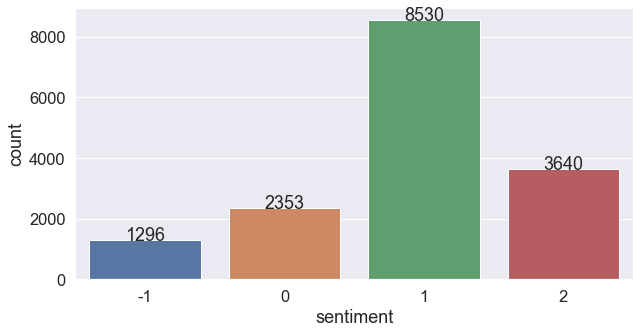

In [10]:
# Countplot for each sentiment
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(ax=ax1,x='sentiment', data=train_df)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

We can see that there is a class imbalance. This tends to be a problem when training a model since the model will be able to train on more data for the majority class and less data for minority class. We will handle this problem as we continue with EDA.  Most of the tweets are from Pro climate change bielivers followed by news tweets.

 ### Extract urls and mentions
 
Returns a DataFrame with three additional columns, "hashtags", "users", "url" and "RT"


In [11]:

def extractor(df):
  
    # Extract hashtags
    tweets = df['message']
    df['hashtags'] = df.message. str.lower().str.findall(r'#.*?(?=\s|$)')
    htags = df['hashtags']
    df['hashtags'] = htags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    # Extract users
    df['users'] = df.message. str.lower().str.findall(r'@\w*')
    mtags = df['users']
    df['users'] = mtags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    # Extract url
    df['url'] = df.message. str.lower().str.findall(r'http\S+|www.\S+')
    urltags = df['url']
    df['url'] = urltags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    return df

In [12]:
extractor(train_df)  

,sentiment,message,tweetid,hashtags,users,url
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc]
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN
2,2,RT @RawStory: Researchers say we have three ye...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]"
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd]
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[#electionnight],[@soynoviodetodas],NaN
...,...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,NaN,[@ezlusztig],[https://…]
15815,2,RT @washingtonpost: How climate change could b...,17856,NaN,[@washingtonpost],[https://t.co/rpfgvb2plq]
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,NaN,NaN,[https://t.co/0mp2]
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,[#agenda2030.],[@sara8smiles],NaN


### Density plot for each sentiment

Text(0, 0.5, 'Density')

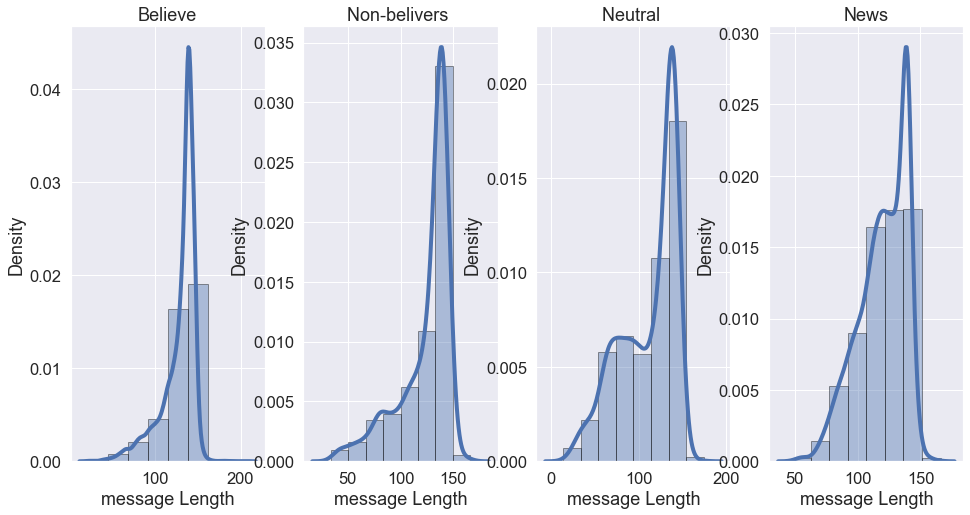

In [13]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

#For  Believe
sns.distplot(train_df[train_df['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Believe')
ax1.set_xlabel('message Length')
ax1.set_ylabel('Density')

#For Non-believers 
sns.distplot(train_df[train_df['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Non-belivers ')
ax2.set_xlabel('message Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(train_df[train_df['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25),  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message Length')
ax3.set_ylabel('Density')

#For Neews
sns.distplot(train_df[train_df['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25),  
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message Length')
ax4.set_ylabel('Density')

Comparing the length of messages using characters it can be seen that  the average length of messages for all sentiments is approximately 140.

### Ckecking for the most popular hashtags and users
To see if we should use hashtags and mentions as features we need to see if the hashtags and mentions are different between sentiments. 
First we'll start with hashtags.

In [14]:
####### Splitting the df into its sentiments

non_believers = train_df[train_df.sentiment == -1]
believe = train_df[train_df.sentiment == 1]
news = train_df[train_df.sentiment == 2]
neutral = train_df[train_df.sentiment == 0]

####### Extracting words which start with a hash
non_believers_hashtags = non_believers.message.str.extractall(r'(\#\w+)')[0].value_counts()
believe_hashtags = believe.message.str.extractall(r'(\#\w+)')[0].value_counts()
news_hashtags = news.message.str.extractall(r'(\#\w+)')[0].value_counts()
neutral_tweets_hashtags = neutral.message.str.extractall(r'(\#\w+)')[0].value_counts()

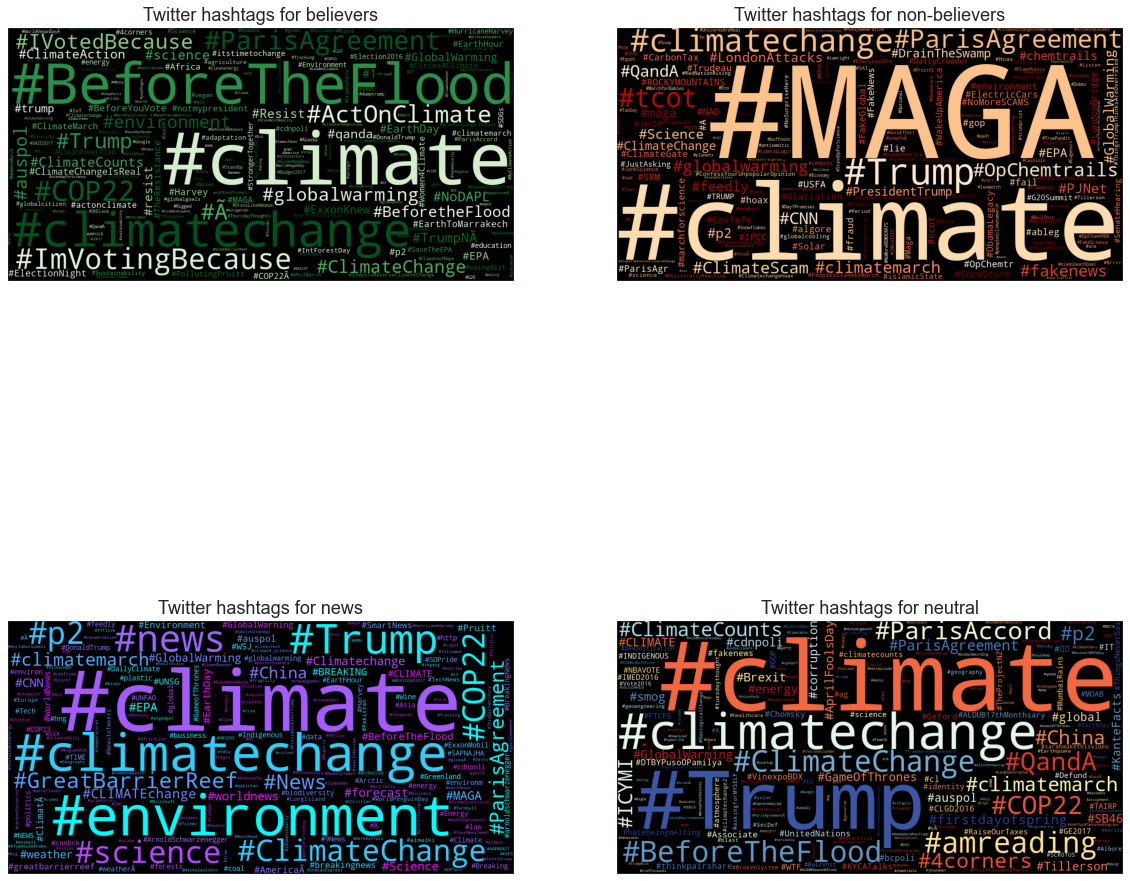

In [20]:
from wordcloud import WordCloud


wordcloud1 = WordCloud(width = 1000, 
                       height = 500, 
                      colormap="Greens_r", 
                       background_color="black").generate_from_frequencies(believe_hashtags.to_dict())
wordcloud2 = WordCloud(width = 1000, 
                       height = 500, 
                      # mask = tweet_mask,
                      colormap="OrRd_r", 
                       background_color="black").generate_from_frequencies(non_believers_hashtags.to_dict())
wordcloud3 = WordCloud(width = 1000, 
                       height = 500, 
                       #mask = tweet_mask,
                      colormap="cool_r", 
                       background_color="black").generate_from_frequencies(news_hashtags.to_dict())
wordcloud4 = WordCloud(width = 1000, 
                       height = 500, 
                       #mask = tweet_mask,
                      colormap="RdYlBu", 
                       background_color="black").generate_from_frequencies(neutral_tweets_hashtags.to_dict())


titles=['Twitter hashtags for believers',
        'Twitter hashtags for non-believers',
        'Twitter hashtags for news',
        'Twitter hashtags for neutral']
images=[wordcloud1, wordcloud2, wordcloud3 ,wordcloud4]

fig, ax = plt.subplots(figsize=(20,20))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
  
plt.show()

In [21]:
# Looking at Counts of the most popular users
counts=train_df.users.value_counts()

In [22]:
df_counts=pd.DataFrame(counts,columns=['users'])

In [23]:
df_counts = df_counts.reset_index()
df_counts.columns = ['users', 'counts']

In [24]:
df_counts.head()

,users,counts
0,[@stephenschlegel],307
1,[@sensanders],243
2,[@realdonaldtrump],143
3,[@berniesanders],121
4,[@cnn],106


We can see that @stephenschlegel is the most popular user with 307 messages followed by @sensanders with 243 messages.

Now we look at popular users for each sentiment

In [25]:
####### Extracting users
non_believers_users = non_believers.message.str.extractall(r'(\@\w+)')[0].value_counts()
believe_users=believe.message.str.extractall(r'(\@\w+)')[0].value_counts()
news_users = news.message.str.extractall(r'(\@\w+)')[0].value_counts()
neutral_users = neutral.message.str.extractall(r'(\@\w+)')[0].value_counts()

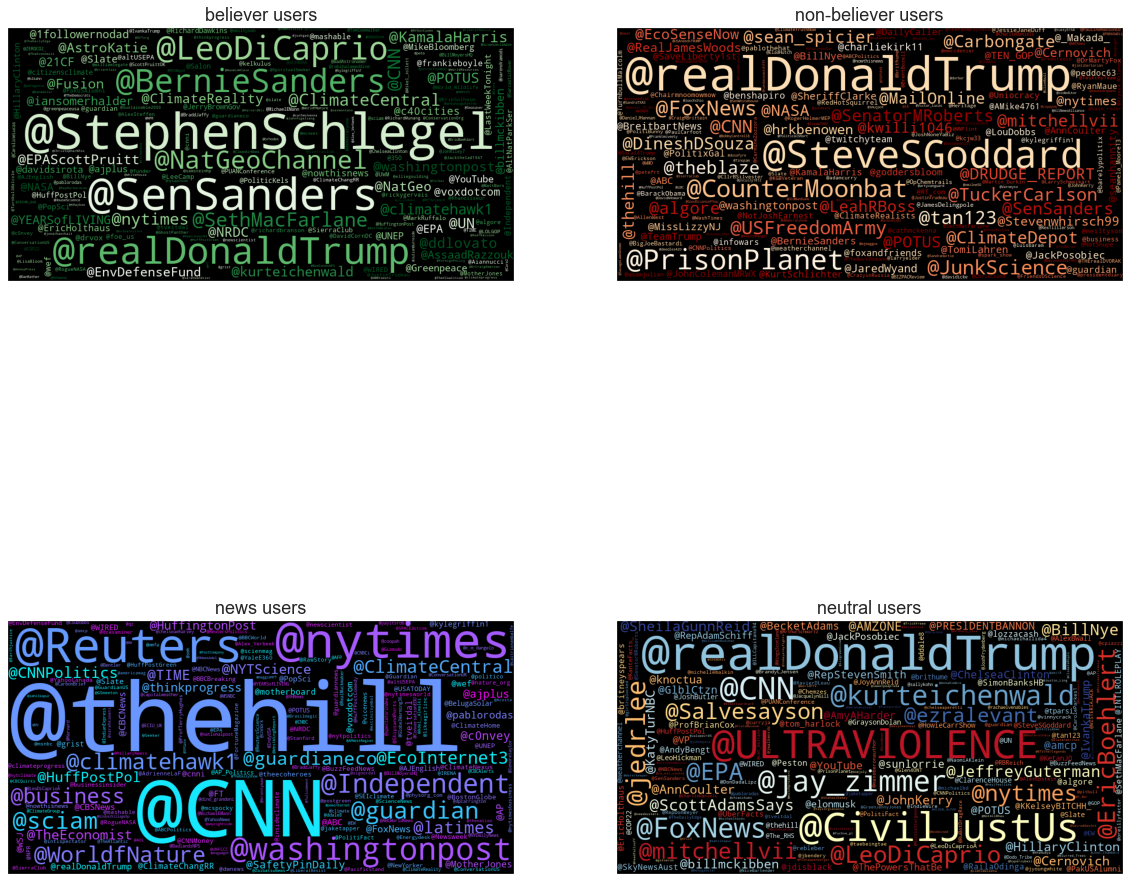

In [27]:
wordcloud1 = WordCloud(width = 1000, 
                       height = 500, 
                      colormap="Greens_r", 
                       background_color="black").generate_from_frequencies(believe_users.to_dict())
wordcloud2 = WordCloud(width = 1000, 
                       height = 500, 
                      colormap="OrRd_r", 
                       background_color="black").generate_from_frequencies(non_believers_users.to_dict())
wordcloud3 = WordCloud(width = 1000, 
                       height = 500, 
                      colormap="cool_r", 
                       background_color="black").generate_from_frequencies(news_users.to_dict())
wordcloud4 = WordCloud(width = 1000, 
                       height = 500, 
                      colormap="RdYlBu", 
                       background_color="black").generate_from_frequencies(neutral_users.to_dict())


titles=['believer users',
        'non-believer users',
        'news users',
        'neutral users']
images=[wordcloud1, wordcloud2, wordcloud3 ,wordcloud4]

fig, ax = plt.subplots(figsize=(20,20))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
  
plt.show()

### Remove noise 

We remove unneccesary information  such as urls,mentions, hashtags and RT.

In [29]:
def remove_noise(df):
    # Remove URLs
    df['message'] = df['message'].str.replace('http\S+|www.\S+', '', case=False)

    # Remove mentions
    df['message'] = df['message'].str.replace('@\w*', '', case=False)

    # Removal hashtags
    df['message'] = df['message'].str.replace('#.*?(?=\s|$)', '', case=False)

    # Remove 'RT'
    df['message'] = df['message'].str.replace('RT', '', case=False)

    return df.head()
    

In [30]:
remove_noise(train_df)

,sentiment,message,tweetid,hashtags,users,url
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc]
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN
2,2,: Researchers say we have three years to act ...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]"
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd]
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN


  ### Remove punctuation and tokenise the text
  We create a function that cleans the tweets by tokenizing, removing punctuation, removing digits and removing 1 character tokens.

In [31]:
# Clean tweets
def clean_tweets(df):
  
    # tokenizing the tweets
    clean_tweets = df['message'].apply(TweetTokenizer().tokenize) ## first we tokenize

    # remove punctuation
    clean_tweets = clean_tweets.apply(lambda x : [token for token in x if token not in string.punctuation])

    # removing digits from the tweets
    clean_tweets = clean_tweets.apply(lambda x: [token for token in x if token not in list(string.digits)])

    # lastly we remove all one character tokens
    clean_tweets = clean_tweets.apply(lambda x: [token for token in x if len(token) > 1])
    
    df['cleaned_tweets'] = clean_tweets
    
    return df['cleaned_tweets']

In [32]:
clean_tweets(train_df)

0        [PolySciMajor, EPA, chief, doesn't, think, car...
1        [It's, not, like, we, lack, evidence, of, anth...
2        [Researchers, say, we, have, three, years, to,...
3        [WIRED, 2016, was, pivotal, year, in, the, war...
4        [It's, 2016, and, racist, sexist, climate, cha...
                               ...                        
15814    [They, took, down, the, material, on, global, ...
15815    [How, climate, change, could, be, breaking, up...
15816    [notiven, nytimesworld, What, does, Trump, act...
15817    [Hey, liberals, the, climate, change, crap, is...
15818         [climate, change, equation, in, screenshots]
Name: cleaned_tweets, Length: 15819, dtype: object

#### Removing Stopwords

In [34]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

# Convert to lower case
train_df['cleaned_tweets'] = train_df['cleaned_tweets'].apply(lambda x: [word.lower() for word in x])

# Remove stopwords
train_df['no_stopwords'] = train_df['cleaned_tweets'].apply(lambda x: [item for item in x if item not in stop])

train_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentiment,message,tweetid,hashtags,users,url,cleaned_tweets,no_stopwords
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc],"[polyscimajor, epa, chief, doesn't, think, car...","[polyscimajor, epa, chief, think, carbon, diox..."
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN,"[it's, not, like, we, lack, evidence, of, anth...","[like, lack, evidence, anthropogenic, global, ..."
2,2,: Researchers say we have three years to act ...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]","[researchers, say, we, have, three, years, to,...","[researchers, say, three, years, act, climate,..."
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd],"[wired, 2016, was, pivotal, year, in, the, war...","[wired, 2016, pivotal, year, war, climate, cha..."
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN,"[it's, 2016, and, racist, sexist, climate, cha...","[2016, racist, sexist, climate, change, denyin..."


**Most Frequent Words**

In [ ]:
from collections import Counter
cnt = Counter()
for message in train_df['no_stopwords'].values:
    for word in message:
        cnt[word] += 1
        
#cnt.most_common()

**Mapping the Sentiment class by name**

In [37]:
train_df['sent_labels']  = train_df['sentiment'].map({-1: 'Anti',0:'Neutral', 1:'Pro', 2:'News'})
train_df.head()

,sentiment,message,tweetid,hashtags,users,url,cleaned_tweets,no_stopwords,sent_labels
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc],"[polyscimajor, epa, chief, doesn't, think, car...","[polyscimajor, epa, chief, think, carbon, diox...",Pro
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN,"[it's, not, like, we, lack, evidence, of, anth...","[like, lack, evidence, anthropogenic, global, ...",Pro
2,2,: Researchers say we have three years to act ...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]","[researchers, say, we, have, three, years, to,...","[researchers, say, three, years, act, climate,...",News
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd],"[wired, 2016, was, pivotal, year, in, the, war...","[wired, 2016, pivotal, year, war, climate, cha...",Pro
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN,"[it's, 2016, and, racist, sexist, climate, cha...","[2016, racist, sexist, climate, change, denyin...",Pro


**Get the length of each raw tweet**

In [38]:
train_df['text_length'] = train_df['message'].apply(lambda x: len(x))

**Separate Dataframes of tweets for each sentiment**

In [39]:
# Dataframe for neutral tweets
neutral_df = train_df[train_df['sentiment'] == 0]
neutral_df.head()

,sentiment,message,tweetid,hashtags,users,url,cleaned_tweets,no_stopwords,sent_labels,text_length
19,0,Calum: *tweets abt reunitingish w the cast*\n-...,547924,NaN,NaN,NaN,"[calum, tweets, abt, reunitingish, the, cast, ...","[calum, tweets, abt, reunitingish, cast, sees,...",Neutral,138
22,0,"we also met this guy, he let us in on some tru...",67545,NaN,NaN,[https://t.co/q7yomcmzaj],"[we, also, met, this, guy, he, let, us, in, on...","[also, met, guy, let, us, truth, climate, chan...",Neutral,98
30,0,are these the same scientists that denounce c...,365051,NaN,[@jnp_ftw],NaN,"[are, these, the, same, scientists, that, deno...","[scientists, denounce, climate, change, choice]",Neutral,78
39,0,We’ ve dealt with simple issues like climate c...,403368,[#qanda],NaN,NaN,"[we, ve, dealt, with, simple, issues, like, cl...","[dealt, simple, issues, like, climate, change,...",Neutral,109
43,0,: Win probability is bullshit man. I saw the ...,326916,NaN,[@andrewsharp],NaN,"[win, probability, is, bullshit, man, saw, the...","[win, probability, bullshit, man, saw, nba, fi...",Neutral,106


In [40]:
# Dataframe for pro tweets
pro_df = train_df[train_df['sentiment'] == 1]
pro_df.head()

,sentiment,message,tweetid,hashtags,users,url,cleaned_tweets,no_stopwords,sent_labels,text_length
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc],"[polyscimajor, epa, chief, doesn't, think, car...","[polyscimajor, epa, chief, think, carbon, diox...",Pro,108
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN,"[it's, not, like, we, lack, evidence, of, anth...","[like, lack, evidence, anthropogenic, global, ...",Pro,62
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd],"[wired, 2016, was, pivotal, year, in, the, war...","[wired, 2016, pivotal, year, war, climate, cha...",Pro,62
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN,"[it's, 2016, and, racist, sexist, climate, cha...","[2016, racist, sexist, climate, change, denyin...",Pro,90
5,1,Woh a read whether you do or don't believe in ...,425577,NaN,NaN,"[https://t.co/gglzvnyjun, https://t.co/7afe2ma...","[woh, read, whether, you, do, or, don't, belie...","[woh, read, whether, believe, climate, change]",Pro,62


In [41]:
# DtataFrame for anti tweets
anti_df = train_df[train_df['sentiment'] == -1]
anti_df.head()

,sentiment,message,tweetid,hashtags,users,url,cleaned_tweets,no_stopwords,sent_labels,text_length
28,-1,Sally Kohn’s latest evidence of climate change...,355491,NaN,[@twitchyteam],[https://t.co/mhkzogl9vt],"[sally, kohn, latest, evidence, of, climate, c...","[sally, kohn, latest, evidence, climate, chang...",Anti,102
46,-1,Carbon Tax is a Globalist idea to enslave the...,61141,NaN,[@realdonaldtrump],NaN,"[carbon, tax, is, globalist, idea, to, enslave...","[carbon, tax, globalist, idea, enslave, world'...",Anti,121
48,-1,: We had winds close to 100 MPH in the area t...,719523,NaN,[@stevesgoddard],NaN,"[we, had, winds, close, to, 100, mph, in, the,...","[winds, close, 100, mph, area, afternoon, woul...",Anti,120
56,-1,lmao 😂 snowflakes ❄️ complaining about snowfl...,911385,NaN,[@misslizzynj],NaN,"[lmao, snowflakes, complaining, about, snowfla...","[lmao, snowflakes, complaining, snowflakes, wi...",Anti,84
57,-1,: This is ONE of Arnold Schwarzenegger's vehi...,768263,NaN,[@dawn2334dawn],[http…],"[this, is, one, of, arnold, schwarzenegger's, ...","[one, arnold, schwarzenegger's, vehicles, whin...",Anti,120


In [42]:
# Dataframe for news tweets
news_df = train_df[train_df['sentiment'] == 2]
news_df.head()

,sentiment,message,tweetid,hashtags,users,url,cleaned_tweets,no_stopwords,sent_labels,text_length
2,2,: Researchers say we have three years to act ...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]","[researchers, say, we, have, three, years, to,...","[researchers, say, three, years, act, climate,...",News,86
12,2,: We only have a 5 percent chance of avoiding...,454673,NaN,[@tveitdal],"[https://t.co/xubtqnxhkk, https://t.co/of…]","[we, only, have, percent, chance, of, avoiding...","[percent, chance, avoiding, dangerous, global,...",News,90
14,2,Fossil fuel giant ExxonMobil ‘misled’ the publ...,658092,NaN,NaN,[https://t.co/ofc2wsu4ex],"[fossil, fuel, giant, exxonmobil, misled, the,...","[fossil, fuel, giant, exxonmobil, misled, publ...",News,98
26,2,Bangladesh confronting climate change head on,365291,NaN,NaN,"[https://t.co/mtqenbqdut, https://t.co/itgkuxg...","[bangladesh, confronting, climate, change, hea...","[bangladesh, confronting, climate, change, head]",News,47
32,2,: Atmospheric rivers fueled by climate change...,143471,NaN,[@latimes],"[https://t.co/p0lzbhlu5k, https://t…]","[atmospheric, rivers, fueled, by, climate, cha...","[atmospheric, rivers, fueled, climate, change,...",News,97


In [43]:
train_df.head()

,sentiment,message,tweetid,hashtags,users,url,cleaned_tweets,no_stopwords,sent_labels,text_length
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc],"[polyscimajor, epa, chief, doesn't, think, car...","[polyscimajor, epa, chief, think, carbon, diox...",Pro,108
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN,"[it's, not, like, we, lack, evidence, of, anth...","[like, lack, evidence, anthropogenic, global, ...",Pro,62
2,2,: Researchers say we have three years to act ...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]","[researchers, say, we, have, three, years, to,...","[researchers, say, three, years, act, climate,...",News,86
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd],"[wired, 2016, was, pivotal, year, in, the, war...","[wired, 2016, pivotal, year, war, climate, cha...",Pro,62
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN,"[it's, 2016, and, racist, sexist, climate, cha...","[2016, racist, sexist, climate, change, denyin...",Pro,90


### 4. Feature Engineering

In [97]:
train_fin = train.copy()
test_fin = test.copy()

In [98]:
# Part of Speech for modeling
def POS(word):
   """
   This function gets the part of speech
   """
   pos_counts = Counter()
   probable_part_of_speech = wordnet.synsets(word)
   pos_counts["n"] = len([i for i in probable_part_of_speech if i.pos()=="n"])
   pos_counts["v"] = len([i for i in probable_part_of_speech if i.pos()=="v"])
   pos_counts["a"] = len([i for i in probable_part_of_speech if i.pos()=="a"])
   pos_counts["r"] = len([i for i in probable_part_of_speech if i.pos()=="r"])
   part_of_speech = pos_counts.most_common(1)[0][0]
   return part_of_speech

In [99]:
normalizer = WordNetLemmatizer()

def replace_sentiments(df):
    """
    replace keywords in the tweets  with associated sentiments
    
    'global' ----> 'negative'
    'climate' ----> 'positive'
    'MAGA'----> 'negative'
    'warm' -----> 'negative'
    'change' ------> 'negative'
    'realdonaltrump'----> 'negative'
    """
    df['message'] = df['message'].apply(lambda x: x.replace('global', 'negative'))
    df['message'] = df['message'].apply(lambda x: x.replace('climate', 'positive'))
    df['message'] = df['message'].apply(lambda x: x.replace('warm', 'negative')) 
    df['message'] = df['message'].apply(lambda x: x.replace('MAGA', 'negative'))
    df['message'] = df['message'].apply(lambda x: x.replace('change', 'negative')) 
    df['message'] = df['message'].apply(lambda x: x.replace('realdonaltrump', 'negative'))

    return df['message']

# replace sentiments
train_fin['clean_tweets'] = replace_sentiments(train_fin)
test_fin['clean_tweets'] = replace_sentiments(test_fin)

# cleaning tweets
train_fin['clean_tweets'] = clean_tweets(train_fin)
test_fin['clean_tweets'] = clean_tweets(test_fin)

# lemmatize
train_fin['clean_tweets'] = train_fin['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])
test_fin['clean_tweets'] = test_fin['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])

#### X and y Metrics

In [100]:
X = train_fin['clean_tweets']
y = train_fin['sentiment']
X_test = test_fin['clean_tweets']

#### Spliting the data

In [101]:
# Splitting the data into 90% train and 10% validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state = 42)

In [102]:
X_train = list(X_train.apply(' '.join))
X_val = list(X_val.apply(' '.join))
X_test = list(X_test.apply(' '.join))

### Creating model Pipelines

In [103]:
# DecisionTreeClassifier Pipeline
tree_tfidf = Pipeline([('tfidf', TfidfVectorizer()),('tree', DecisionTreeClassifier()),])
tree_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('tree', DecisionTreeClassifier()),])


# RandomForestClassifier Pipeline
rfc_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('rfc', RandomForestClassifier())])
rfc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('rfc', RandomForestClassifier()),])


# LinearSVC Pipeline
Lsvc_tfidf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('scv', LinearSVC()),])
Lsvc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('svc', LinearSVC()),])



# Logistic Regression pipeline
logreg_tfidf = Pipeline([('tfidf', TfidfVectorizer()),('logistic', LogisticRegression()),])
logreg_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('logistic', LogisticRegression()),])



# SGD Classifier pipeline
SGD_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('SGD', SGDClassifier())])
SGD_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('SGD', SGDClassifier()),])




# Support Vector Classifier Pipeline
svc_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('SVC', SVC())])
svc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('SVC', SVC()),])

# Ridge Classifier
ridge_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('Ridge', RidgeClassifier())])
ridge_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('Ridge', RidgeClassifier()),])

### Model training

In [104]:
# training the decision tree pipeline
tree_tfidf.fit(X_train, y_train)
tree_count.fit(X_train, y_train)

# training the RandomForest pipleline
rfc_tfidf.fit(X_train, y_train)
rfc_count.fit(X_train, y_train)

# training the LinearSVC pipeline
Lsvc_tfidf.fit(X_train, y_train)
Lsvc_count.fit(X_train, y_train)

# training the logistic regression pipeline
logreg_tfidf.fit(X_train, y_train)
logreg_count.fit(X_train, y_train)

# training the SGD Classifier
SGD_tfidf.fit(X_train, y_train)
SGD_count.fit(X_train, y_train)

# training the support vector classifier
svc_tfidf.fit(X_train, y_train)
svc_count.fit(X_train, y_train)

# training the Ridge classifier
ridge_tfidf.fit(X_train, y_train)
ridge_count.fit(X_train, y_train)

Pipeline(steps=[('CountVec',
                 CountVectorizer(max_features=180000, ngram_range=(1, 2))),
                ('Ridge', RidgeClassifier())])

#### Calculating average scores for the TFIDF vectoriser

In [105]:
tree_acc =  accuracy_score(y_val,tree_tfidf.predict(X_val))
rfc_acc = accuracy_score(y_val,rfc_tfidf.predict(X_val))
lsvc_acc = accuracy_score(y_val,Lsvc_tfidf.predict(X_val))
log_acc = accuracy_score(y_val, logreg_tfidf.predict(X_val))
sgd_acc = accuracy_score(y_val, SGD_tfidf.predict(X_val))
svc_acc = accuracy_score(y_val, svc_tfidf.predict(X_val))
ridge_acc = accuracy_score(y_val, ridge_tfidf.predict(X_val))
 
tfidf_avg_accuracy = round(np.mean([tree_acc,rfc_acc,lsvc_acc,log_acc,sgd_acc,svc_acc,ridge_acc]),4)

In [106]:
print(tfidf_avg_accuracy)

0.7265


#### Calculating average scores for the Count vectoriser

In [107]:
tree_acc =  accuracy_score(y_val,tree_count.predict(X_val))
rfc_acc = accuracy_score(y_val,rfc_count.predict(X_val))
lsvc_acc = accuracy_score(y_val,Lsvc_count.predict(X_val))
log_acc = accuracy_score(y_val, logreg_count.predict(X_val))
sgd_acc = accuracy_score(y_val, SGD_count.predict(X_val))
svc_acc = accuracy_score(y_val, svc_count.predict(X_val))
ridge_acc = accuracy_score(y_val, ridge_count.predict(X_val))

CountVec = round(np.mean([tree_acc,rfc_acc,lsvc_acc,log_acc,sgd_acc,svc_acc, ridge_acc]),4)

In [108]:
print(CountVec)

0.7553


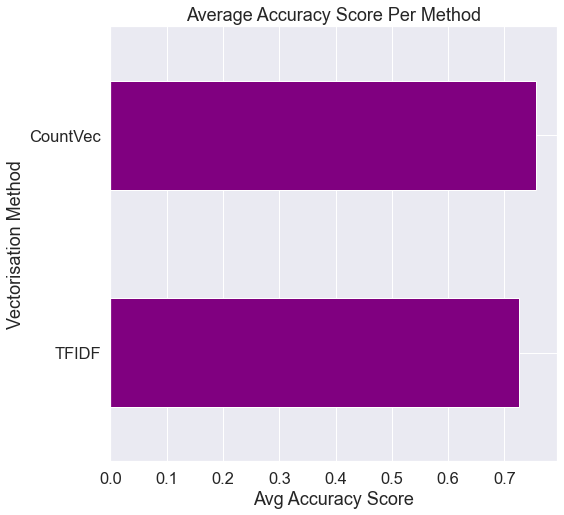

In [109]:
accuracy_dict = {'TFIDF':[tfidf_avg_accuracy], 'CountVec':[CountVec]}
accuracy_df = pd.DataFrame(accuracy_dict)
accuracy_df.T.plot(kind='barh', figsize = (8,8),legend = False, color = ['purple'])
plt.xlabel('Avg Accuracy Score')
plt.ylabel('Vectorisation Method')
plt.yticks(rotation = 360)
plt.title('Average Accuracy Score Per Method')
plt.show()

From the above plot we can see that Count Vectorisation has on average higher acurracy scores compared to tfidf vectorisation. Therefore, we will
be using the count vectorisation method pipeline for our final validation tests.

#### Making validations set predicions

In [110]:
tree_prediction = tree_count.predict(X_val) # DecisionTreeClassifier predictions
rfc_prediction = rfc_count.predict(X_val) # RandomForestClassifier predictions
Lsvc_prediction = Lsvc_count.predict(X_val) # LinearSVClassifier Predictions
logreg_prediction = logreg_count.predict(X_val) # Logistic regression predictions
SGD_prediction = SGD_count.predict(X_val) # SGD Classifier predictions
SVC_prediction = svc_count.predict(X_val) # Support vector machine predictions
ridge_prediction = ridge_count.predict(X_val) # Ridge predictions

#### LinearSVClassifier Scores

In [111]:
linearSVC_acc = round(accuracy_score(y_val, Lsvc_prediction),4)
print(f'\nOverall accuracy score for LinearSVC Model : {linearSVC_acc}')
linearSVC_f1 = round(f1_score(y_val, Lsvc_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score for LinearSVC Model : {linearSVC_f1}')


Overall accuracy score for LinearSVC Model : 0.7889

Weighted avg f1 score for LinearSVC Model : 0.7834


#### Ridge Classifier Scores

In [112]:
ridge_acc = round(accuracy_score(y_val, ridge_prediction),4)
print(f'\nRidge Classifier accuracy Score : {ridge_acc}')
ridge_f1 = round(f1_score(y_val, ridge_prediction, average="weighted"),4)
print(f'\nRidge Classifier weighted avg f1 score : {ridge_f1}')


Ridge Classifier accuracy Score : 0.7807

Ridge Classifier weighted avg f1 score : 0.7731


#### Support vector machine scores

In [113]:
svc_acc = round(accuracy_score(y_val, SVC_prediction),4)
print(f'\nSupport Vector Classifier accuracy Score : {svc_acc}')
svc_f1 = round(f1_score(y_val, SVC_prediction, average="weighted"),4)
print(f'\nSupport Vector Classifier weighted avg f1 score : {svc_f1}')


Support Vector Classifier accuracy Score : 0.7465

Support Vector Classifier weighted avg f1 score : 0.729


#### SGD Classifier scores

In [114]:
sgd_acc = round(accuracy_score(y_val, SGD_prediction),4)
print('\nSGD Classifier accuracy Score :\n', sgd_acc)
sgd_f1 = round(f1_score(y_val, SGD_prediction, average="weighted"),4)
print('\nSGD weighted avg f1_score :\n', sgd_f1)


SGD Classifier accuracy Score :
 0.7939

SGD weighted avg f1_score :
 0.7839


#### Logistic regression scores

In [115]:
logistic_reg_acc = round(accuracy_score(y_val, logreg_prediction),4)
print('\nLogistic Regression accuracy Score\n', logistic_reg_acc)
logistic_reg_f1 = round(f1_score(y_val, logreg_prediction, average="weighted"),4)
print('\nLogistic Regression weighted f1 score\n', logistic_reg_f1)



Logistic Regression accuracy Score
 0.7857

Logistic Regression weighted f1 score
 0.7786


#### DecisionTreeClassifier scores

In [116]:
decison_tree_acc = round(accuracy_score(y_val, tree_prediction),4)
print(f'\nOverall accuracy score for Decision Tree : {decison_tree_acc}')
decision_tree_f1 = round(f1_score(y_val, tree_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score Decision Tree {decision_tree_f1}' )



Overall accuracy score for Decision Tree : 0.6631

Weighted avg f1 score Decision Tree 0.6559


#### RandomForestClassifier scores

In [117]:
random_forest_acc = round(accuracy_score(y_val, rfc_prediction),4)
print(f'\nOveral accuracy score for RandomForestClassifier :{random_forest_acc}')
random_forest_f1 = round(f1_score(y_val, rfc_prediction, average="weighted"),4)
print(f'\nWeighted f1 score for RandomForestClassifier : {random_forest_f1}')


Overal accuracy score for RandomForestClassifier :0.7282

Weighted f1 score for RandomForestClassifier : 0.6952


### Creating a dataframe with our models and their performances metrics

In [118]:

classifier_scores = {'Classifiers':['Decision Tree', 'Random Forest','LinearSVC',
                                    'Logistic Regression','Stochastic Gradient Descent',
                                    'Support Vector Classifier','Ridge Classifier'],
                    'Accuracy':[decison_tree_acc,random_forest_acc,
                                linearSVC_acc,logistic_reg_acc, sgd_acc, svc_f1, ridge_acc],
                     'Weighted avg f1 Score':[decision_tree_f1,random_forest_f1,
                                       linearSVC_f1,logistic_reg_f1, sgd_f1, svc_f1, ridge_f1]}
df= pd.DataFrame(classifier_scores)
df.sort_values(by=['Accuracy'],ascending=True, inplace = True)
df

,Classifiers,Accuracy,Weighted avg f1 Score
0,Decision Tree,0.6631,0.6559
1,Random Forest,0.7282,0.6952
5,Support Vector Classifier,0.7290,0.7290
6,Ridge Classifier,0.7807,0.7731
3,Logistic Regression,0.7857,0.7786
2,LinearSVC,0.7889,0.7834
4,Stochastic Gradient Descent,0.7939,0.7839


#### Ridgde CSV

In [ ]:
y_pred = ridge_count.predict(X_test)

In [ ]:
test_data['sentiment'] = y_pred

In [ ]:
test_data[['tweetid','sentiment']].to_csv('Ridge1_Submission.csv', index=False)

In [ ]:
test_data[['tweetid','sentiment']].to_csv('Ridge1_Submission.csv', index=False)

#### Logisitc CSV

In [ ]:
y_pred1 = logreg_count.predict(X_test)
print(y_pred1)

In [ ]:
test_fin['sentiment'] = y_pred1

In [ ]:
test_fin[['tweetid','sentiment']].to_csv('logisitc1_Submission.csv', index=False)

In [ ]:
test_fin[['tweetid','sentiment']]

#### Lsvc CSV

In [ ]:
y_pred2 = Lsvc_count.predict(X_test)
print(y_pred2)

In [ ]:
test_fin['sentiment'] = y_pred2

In [ ]:
test_fin[['tweetid','sentiment']].to_csv('lsvc1_Submission.csv', index=False)

In [ ]:
test_fin[['tweetid','sentiment']]

#### SGD CSV

In [130]:
y_pred3 = SGD_count.predict(X_test)
print(y_pred3)

In [ ]:
test_fin['sentiment'] = y_pred3

In [ ]:
test_fin[['tweetid','sentiment']].to_csv('SGD1_Submission.csv', index=False)

In [ ]:
test_fin[['tweetid','sentiment']]

#### Hyperparameter tuning

In [ ]:
# We have to to prepare our data again since we wont be using the pipelines

train = train_data.copy()
test = test_data.copy()

train['message'] = replace_sentiments(train)
test['message'] = replace_sentiments(test)
train['clean_tweets'] = clean_tweets(train)
test['clean_tweets'] = clean_tweets(test)

normalizer = WordNetLemmatizer()
train['clean_tweets'] = train['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])
test['clean_tweets'] = test['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])



X = train['clean_tweets']
y = train['sentiment']
X_test = test['clean_tweets']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train = list(X_train.apply(' '.join))
X_val = list(X_val.apply(' '.join))
X_test = list(X_test.apply(' '.join))

In [ ]:
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

In [ ]:
# Tunning Ridge Classifier using GridSearchCV

# The hyperprarameter gridsearch for the logistic regression model is purposefully commented out because 
# it perfoms 5 folds for each of the 50 candidates totalling in 250 fits, this GridSearch  code took 57 minutes to complete
#  we have saved the resulting model as a pickle file

'''
param_grid = {'alpha':np.logspace(-4, 4, 50)}
grid = GridSearchCV(RidgeClassifier(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(accuracy_score(y_val, grid.predict(X_val)))
'''
best_params = {'alpha': 11.513953993264458}
# retrain the model with best params
ridge_grid = RidgeClassifier(alpha=11.513953993264458)
ridge_grid.fit(X_train, y_train)

In [ ]:
# accuracy of the ridge gridsearch model
print(f1_score(y_val, ridge_grid.predict(X_val), average = 'weighted'))

In [ ]:
# retraining the best Ridge Classifer model we have
ridge_tuned = RidgeClassifier(alpha=5.428675439323859, class_weight=None, copy_X=True,
                fit_intercept=True, max_iter=None, normalize=False,
                random_state=None, solver='auto', tol=0.001) 
ridge_tuned.fit(X_train, y_train)

In [ ]:
# Checking the accuracy score
ridge_prediction_tuned =ridge_tuned.predict(X_val)

ridge_acc_2 = round(accuracy_score(y_val, ridge_prediction_tuned),4)
print(f'\nOverall accuracy score for Ridge Classifier accuracy Score : {ridge_acc}')
ridge_f1_2 = round(f1_score(y_val, ridge_prediction_tuned, average="weighted"),4)
print(f'\nWeighted avg f1 score for Ridge Classifier : {ridge_f1}')

In [ ]:
# Saving the model
import pickle
model_save_path = 'Ridgeclfr.pkl'
with open(model_save_path, 'wb') as file:
  pickle.dump(ridge_tuned, file)

In [ ]:
print('classfication report for our best model\n',classification_report(y_val, ridge_tuned.predict(X_val)))

In [ ]:
# # Visual represetation of of the f1 score for each class
report_ridge = classification_report(y_val, ridge_prediction_tuned, output_dict=True)
df_ridge = pd.DataFrame(report_ridge).transpose()
df_ridge.drop(['accuracy'], inplace = True)
df_ridge.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_ridge.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for tunned SVC')
plt.show()

In [ ]:
y_pred4 = ridge_tuned.predict(X_test)
print(y_pred)

In [ ]:
test_data['sentiment'] = y_pred4

In [ ]:
test_data[['tweetid','sentiment']].to_csv('Ridge Submission.csv', index=False)

In [ ]:
test_data[['tweetid','sentiment']]